# Ford GoBike Data exploration
## by Kirolos Samuel Azmy Guirgis
### From Egypt

## Table Of Contents:
* [Introduction](#first-bullet)
* [Preliminary Wrangling](#second-bullet)

1. [Loading Libraries](#load)
2. [Data Wrangling](#wrangle)
  1. [Gathering Data](#gather)
  2. [Asses Data](#asses)
  3. [Clean Data](#clean)

3. [Data Exploration (EDA)](#explore)
  1. [Structure of Data](#struct)
  2. [Univariate exploration](#uni)
  3. [Bivariate exploration](#bi)
  4. [Multivariate exploration](#mu)



## Introduction <a class="anchor" id="first-bullet"></a>

Ford GoBike has become one of the most popular bike sharing facilitator present in USA.
gained popularity as one of the best bike sharing facilitator present in the United States. 
In this report we would focus on the customer behaviour in 2019 year which would help us understand the customer trends and needs. We would also be seeing the duration of trips,months trends and many other essential targets such as the start and end stations to build a better intuition about the data. 


### Preliminary Wrangling <a class="anchor" id="second-bullet"></a>

- Our analysis will depend on the data that downloaded from the link 
  https://s3.amazonaws.com/baywheels-data/index.html 
  
- Our major aim is to understand the following. 
1. What is the best time that the user like to start his trip during his day or week or even month?
2. Does the season affect their usage through the year? 
3. Does the user type really make an effectt?
4. Who should be our target customers ? In terms of advertising , who are our target audience ? 

## 1. Loading Libraries <a class="anchor" id="load"></a>


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob
from matplotlib import rcParams
%matplotlib inline
from datetime import datetime

## 2. Data Wrangling <a class="anchor" id="wrangle"></a>


### A. Gather Data <a class="anchor" id="gather"></a>

In [3]:
path = r'C:\Users\Kiro\Desktop\Final Project\Dataset\2019FordGoBikeData'               
all_files = glob.glob(os.path.join(path, "*.csv"))     
df_files = (pd.read_csv(f) for f in all_files)
df_bikes = pd.concat(df_files, ignore_index=True)

c:\users\kiro\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\concat.py:348: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)
c:\users\kiro\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\concat.py:348: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


### B. Asses Data <a class="anchor" id="asses"></a>

Before , We move any further we must take a look at the size of the data. 

In [4]:
df_bikes.head(5)

duration_sec                start_time                  end_time  \
0         80825  2019-01-31 17:57:44.6130  2019-02-01 16:24:49.8640   
1         65900  2019-01-31 20:58:33.8860  2019-02-01 15:16:54.1730   
2         62633  2019-01-31 18:06:52.9240  2019-02-01 11:30:46.5300   
3         44680  2019-01-31 19:46:09.7190  2019-02-01 08:10:50.3180   
4         60709  2019-01-31 14:19:01.5410  2019-02-01 07:10:51.0650   

   start_station_id           start_station_name  start_station_latitude  \
0             229.0    Foothill Blvd at 42nd Ave               37.775745   
1               4.0  Cyril Magnin St at Ellis St               37.785881   
2             245.0       Downtown Berkeley BART               37.870139   
3              85.0      Church St at Duboce Ave               37.770083   
4              16.0      Steuart St at Market St               37.794130   

   start_station_longitude  end_station_id              end_station_name  \
0              -122.213037           196.0       Grand Ave at Perkins St   
1              -122.408915           134.0        Valencia St at 24th St   
2              -122.268422           157.0          65th St at Hollis St   
3              -122.429156            53.0        Grove St at Divisadero   
4              -122.394430            28.0  The Embarcadero at Bryant St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0             37.808894            -122.256460     4861  Subscriber   
1             37.752428            -122.420628     5506  Subscriber   
2             37.846784            -122.291376     2717    Customer   
3             37.775946            -122.437777     4557    Customer   
4             37.787168            -122.388098     2100    Customer   

  bike_share_for_all_trip rental_access_method  
0                      No                  NaN  
1                      No                  NaN  
2                      No                  NaN  
3                      No                  NaN  
4                      No                  NaN

In [5]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356881 entries, 0 to 2356880
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 269.7+ MB


In [6]:
df_bikes.shape

(2356881, 15)

#### There are 15 Column and 2356881 record in the data

*** 

#### Let's find if there are any duplicate data

In [7]:
df_bikes.duplicated().any()

False

- Fortunately There is no duplicated data at all

***

#### Find if there are any missing data in the data

In [8]:
na_counts=df_bikes.isnull().sum()
na_counts

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             59715
start_station_name           59118
start_station_latitude           0
start_station_longitude          0
end_station_id               61555
end_station_name             61005
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip      93157
rental_access_method       2263724
dtype: int64

#### Remove the zero null columns

In [9]:
df_bikes_copy=df_bikes.copy()

In [10]:
df_bikes_copy.drop(['duration_sec','start_time','end_time','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id','user_type'],axis=1,inplace=True)

In [11]:
na_counts=df_bikes_copy.isnull().sum()
na_counts=na_counts/1000
na_counts=na_counts.sort_values(ascending=False)


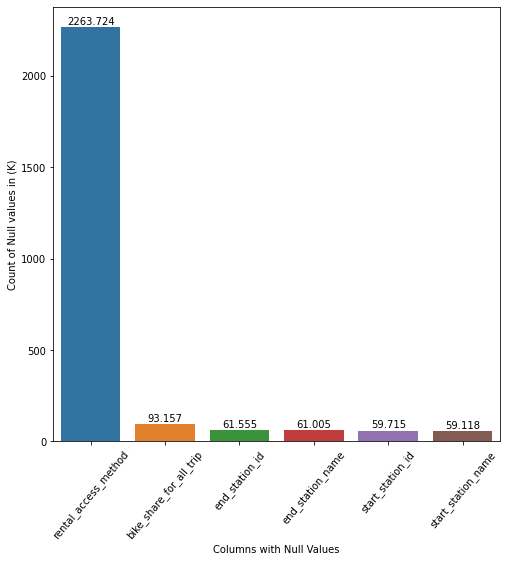

In [12]:
plt.figure(figsize=[8,8])
sns.barplot(y=na_counts,x=na_counts.index,order=na_counts.index)
plt.xlabel('Columns with Null Values')
plt.ylabel('Count of Null values in (K)')
plt.xticks(rotation=50);
for i in range(len(na_counts)):
    plt.text(i,na_counts[i]+15,str(na_counts[i]),ha='center',color='black')

- As shown above , that most records has Nan rental acess method column value , so it is very important to remove this column in cleaning process

***

#### Checking the data types of the columns

In [13]:
df_bikes.end_station_id.dtype

dtype('float64')

In [14]:
df_bikes.start_time.dtype

dtype('O')

- There are a lot of wrong data types assigning such as assigning 
 1. Id column to float datatype 
 2. start and end time into object datatype and not datetime datatype

***

#### Checking the importance of different fields in the data

- There are multiple data columns that are not that important in exploration which are:
  1. start_station_latitude
  2. start_station_longitude
  3. end_station_latitude
  4. end_station_longitude

***

#### Findings 

<ol type="a">
  <li>Tidiness of data</li>
    <ol>
        <li>There are many missing columns such as Month,Day,Season and Weekend.</li>
        <li> Unrequired columns. </li>
        <li> Duration in seconds will affect the perception of duration data. </li>
        </ol>
    <li> Quality of data</li>
    <ol>
        <li>Error in some columns datatyes. </li>
        <li>Possible outliers.</li>
        <li>Missing records</li>
    </ol>

</ol>


***

***

### C. Data Cleaning <a class="anchor" id="clean"></a>

### 1. Tidiness of data

##### A. Removing unrequired data

In [15]:
df_bikes.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [16]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356881 entries, 0 to 2356880
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   end_station_id           float64
 6   end_station_name         object 
 7   bike_id                  int64  
 8   user_type                object 
 9   bike_share_for_all_trip  object 
 10  rental_access_method     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 197.8+ MB


- We will also remove the rental access method column as it contains a lot of missing data that cannot be recovered

In [17]:
df_bikes.drop(['rental_access_method'],axis=1,inplace=True)

In [18]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356881 entries, 0 to 2356880
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   end_station_id           float64
 6   end_station_name         object 
 7   bike_id                  int64  
 8   user_type                object 
 9   bike_share_for_all_trip  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 179.8+ MB


***

##### B. Changing duration in second 

In [19]:
df_bikes.duration_sec.describe()

count    2.356881e+06
mean     8.087309e+02
std      1.898050e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      8.621700e+04
Name: duration_sec, dtype: float64

- The maximum duration is 86k seconds which is about a day and the minimum is 60 seconds which is only a minute , so we need to convert the duration in second column into 2 columns one in minute and other in hours 

In [20]:
df_bikes['duration_min']=df_bikes.duration_sec/60
df_bikes['duration_hrs']=df_bikes.duration_sec/3600

In [21]:
df_bikes.drop('duration_sec',axis=1,inplace=True)

In [22]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356881 entries, 0 to 2356880
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   start_time               object 
 1   end_time                 object 
 2   start_station_id         float64
 3   start_station_name       object 
 4   end_station_id           float64
 5   end_station_name         object 
 6   bike_id                  int64  
 7   user_type                object 
 8   bike_share_for_all_trip  object 
 9   duration_min             float64
 10  duration_hrs             float64
dtypes: float64(4), int64(1), object(6)
memory usage: 197.8+ MB


***

##### C. Convert start and end time columns into more meaningful columns (Day,Weekend,Month,Season)
#### Note that the sunday and saturday are considered the weekend days in USA

In [23]:
def map_hour(hour):
    if hour in range(0,13):
        return 'Morning'
    elif hour in range(13,19):
        return 'Afternoon'
    else:
        return 'Evening'

In [24]:
def map_month(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [25]:
def map_day(day):
    if day in ['Sunday','Saturday']:
        return 'Weekend'
    else:
        return 'Not Weekend'

In [26]:
df_bikes.start_time=pd.to_datetime(df_bikes.start_time,format="%Y-%m-%d %H:%M:%S.%f")

In [27]:
df_bikes.start_time.head(3)

0   2019-01-31 17:57:44.613
1   2019-01-31 20:58:33.886
2   2019-01-31 18:06:52.924
Name: start_time, dtype: datetime64[ns]

In [28]:
df_bikes.end_time=pd.to_datetime(df_bikes.end_time,format="%Y-%m-%d %H:%M:%S.%f")

In [29]:
df_bikes.end_time.head(3)

0   2019-02-01 16:24:49.864
1   2019-02-01 15:16:54.173
2   2019-02-01 11:30:46.530
Name: end_time, dtype: datetime64[ns]

In [30]:
df_bikes['Trip Month']=df_bikes.start_time.dt.month_name()

In [31]:
df_bikes['Trip Day']=df_bikes.start_time.dt.day_name()

In [32]:
df_bikes['Period in day']=df_bikes.start_time.dt.hour.apply(map_hour)

In [33]:
df_bikes['Season']=df_bikes.start_time.dt.month.apply(map_month)

In [34]:
df_bikes['Weekend']=df_bikes['Trip Day'].apply(map_day)

In [35]:
df_bikes.head(3)

start_time                end_time  start_station_id  \
0 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864             229.0   
1 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173               4.0   
2 2019-01-31 18:06:52.924 2019-02-01 11:30:46.530             245.0   

            start_station_name  end_station_id         end_station_name  \
0    Foothill Blvd at 42nd Ave           196.0  Grand Ave at Perkins St   
1  Cyril Magnin St at Ellis St           134.0   Valencia St at 24th St   
2       Downtown Berkeley BART           157.0     65th St at Hollis St   

   bike_id   user_type bike_share_for_all_trip  duration_min  duration_hrs  \
0     4861  Subscriber                      No   1347.083333     22.451389   
1     5506  Subscriber                      No   1098.333333     18.305556   
2     2717    Customer                      No   1043.883333     17.398056   

  Trip Month  Trip Day Period in day  Season      Weekend  
0    January  Thursday     Afternoon  Winter  Not Weekend  
1    January  Thursday       Evening  Winter  Not Weekend  
2    January  Thursday     Afternoon  Winter  Not Weekend

***

### 2. Quality of data

##### A. Missing records

In [36]:
df_bikes.isnull().sum()

start_time                     0
end_time                       0
start_station_id           59715
start_station_name         59118
end_station_id             61555
end_station_name           61005
bike_id                        0
user_type                      0
bike_share_for_all_trip    93157
duration_min                   0
duration_hrs                   0
Trip Month                     0
Trip Day                       0
Period in day                  0
Season                         0
Weekend                        0
dtype: int64

In [37]:
df_bikes.dropna(axis=0,how='any',inplace=True)

In [38]:
df_bikes.isnull().sum()

start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
duration_min               0
duration_hrs               0
Trip Month                 0
Trip Day                   0
Period in day              0
Season                     0
Weekend                    0
dtype: int64

- As shown above there is no null values in the dataframe any more

***

##### B. Error in some columns datatyes.


In [39]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   end_station_id           float64       
 5   end_station_name         object        
 6   bike_id                  int64         
 7   user_type                object        
 8   bike_share_for_all_trip  object        
 9   duration_min             float64       
 10  duration_hrs             float64       
 11  Trip Month               object        
 12  Trip Day                 object        
 13  Period in day            object        
 14  Season                   object        
 15  Weekend                  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usage: 293.

- We notice that all columns specifying an id has wrong datatype.

In [40]:
df_bikes.start_station_id=df_bikes.start_station_id.astype(np.int64);
df_bikes.end_station_id=df_bikes.end_station_id.astype(np.int64);

In [41]:
print(df_bikes.end_station_id.dtype)
print(df_bikes.end_station_id.dtype)

int64
int64


- As shown above there is no inappropriate datatypes for any column

***

##### C. Possible outliers.

In [42]:
df_bikes.duration_hrs.max()

23.949166666666667

In [43]:
df_bikes.duration_hrs.sort_values()

483936      0.016944
772208      0.016944
295647      0.016944
438895      0.016944
2147261     0.016944
             ...    
2190150    23.870833
1165301    23.875556
1741971    23.920556
644460     23.920556
1265667    23.949167
Name: duration_hrs, Length: 2262979, dtype: float64

- There is no outliers in the duration as shown above in the sorted column that its okay to have a trip of 0.02 hour or even with 23.95 hour.

In [44]:
base_color=sns.color_palette()[0]

***

## 3. Data Exploration <a class="anchor" id="explore"></a>


In [45]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         int64         
 3   start_station_name       object        
 4   end_station_id           int64         
 5   end_station_name         object        
 6   bike_id                  int64         
 7   user_type                object        
 8   bike_share_for_all_trip  object        
 9   duration_min             float64       
 10  duration_hrs             float64       
 11  Trip Month               object        
 12  Trip Day                 object        
 13  Period in day            object        
 14  Season                   object        
 15  Weekend                  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 293.

### A. Structure of Data <a class="anchor" id="struct"></a>

- Our data contains **2262979 records for 16 columns**. We can have a glimpse of the dataset below :

In [47]:
df_bikes.head(3)

start_time                end_time  start_station_id  \
0 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864               229   
1 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173                 4   
2 2019-01-31 18:06:52.924 2019-02-01 11:30:46.530               245   

            start_station_name  end_station_id         end_station_name  \
0    Foothill Blvd at 42nd Ave             196  Grand Ave at Perkins St   
1  Cyril Magnin St at Ellis St             134   Valencia St at 24th St   
2       Downtown Berkeley BART             157     65th St at Hollis St   

   bike_id   user_type bike_share_for_all_trip  duration_min  duration_hrs  \
0     4861  Subscriber                      No   1347.083333     22.451389   
1     5506  Subscriber                      No   1098.333333     18.305556   
2     2717    Customer                      No   1043.883333     17.398056   

  Trip Month  Trip Day Period in day  Season      Weekend  
0    January  Thursday     Afternoon  Winter  Not Weekend  
1    January  Thursday       Evening  Winter  Not Weekend  
2    January  Thursday     Afternoon  Winter  Not Weekend

### What is/are the main feature(s) of interest in your dataset?

Our basic aim is to find when has the most number of trips been taken including season in the year , Day in the week and if it is a weekend or not and what is the best period in the day that most trips take place.
Although whether the user type afffect the average time of the trip, if so then what would this difference mean to us ? Hence , Duration and user_type seems to be a good start but thinking from a sales perspective we must also evaluate which station is more profitable for us.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

As previously mentioned , Our main feature would be 
1. Station start 
2. Duration 
3. Station end 
4. User_type 
5. Trip Day.
6. Weekend
7. Season
8. Period in the day

### B. Univariate exploration <a class="anchor" id="uni"></a>

In [48]:
def uni_categ_plot(col_name,var_count,sort=True):
    col_distro=df_bikes.loc[:,col_name].value_counts(sort=sort)
    sns.countplot(data=df_bikes,x=df_bikes.loc[:,col_name],color=sns.color_palette()[0],order=col_distro.index)
    plt.xticks(rotation=50);
    for i in range(var_count):
        plt.text(i,col_distro[i]+2150,str(col_distro[i]),ha='center',color='red')

#### Exploring the effect of the day of the trip on the number of trips through the year 

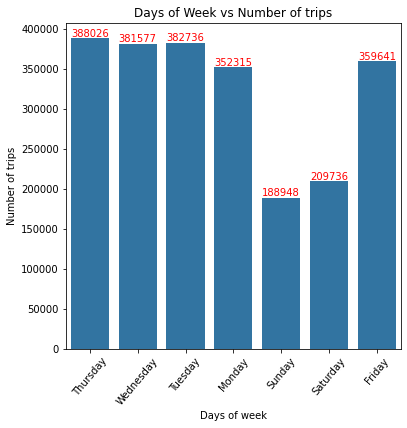

In [49]:
plt.figure(figsize=[6,6])
uni_categ_plot('Trip Day',7,sort=False);
plt.xlabel('Days of week');
plt.ylabel('Number of trips');
plt.title('Days of Week vs Number of trips');

- The plot mainly shows how enormously the weekends affect the number of trips not only in the normal weekends days , but also the day before and after them like in Friday and Monday which has the least number of trips after the weekends days.
- The reason behind that could be that the employees uses the bikes during their trips to or from the offices and finally after a long week , they decided to change the routine in the weekends

#### Exploring whether the different periods of the day will affect the number of the trips

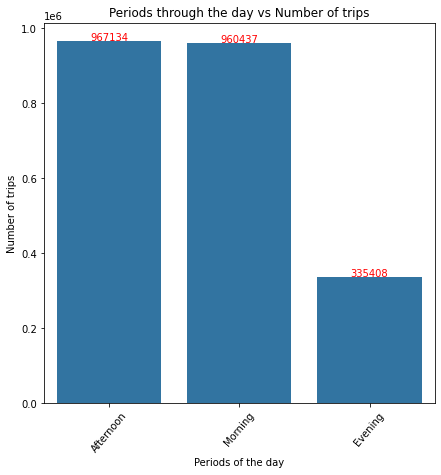

In [50]:
plt.figure(figsize=[7,7])
uni_categ_plot('Period in day',3,sort=True);
plt.xlabel('Periods of the day');
plt.ylabel('Number of trips');
plt.title('Periods through the day vs Number of trips');

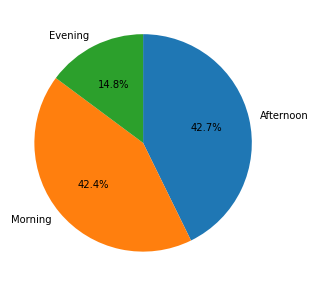

In [51]:
plt.figure(figsize=[5,5])
plt.pie(x=df_bikes['Period in day'].value_counts(),labels=df_bikes['Period in day'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- As shown in the plot in previous slide that afternoon and the morning are the dominant periods through the day with a huge drop of the precentage of the evening period which may be due to that most people went to their offices in the morning and also uses them to get back to home

#### Exploring whether the season during 2019 affected the number of the trips

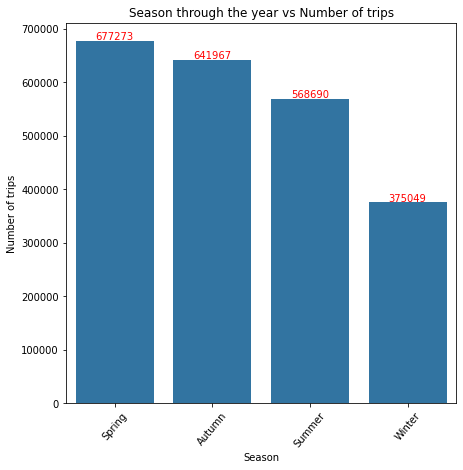

In [52]:
plt.figure(figsize=[7,7])
uni_categ_plot('Season',4,sort=True);
plt.xlabel('Season');
plt.ylabel('Number of trips');
plt.title('Season through the year vs Number of trips');

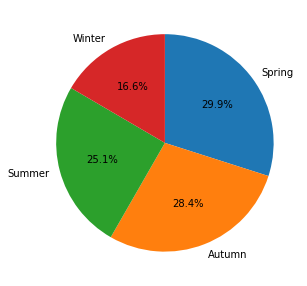

In [53]:
plt.figure(figsize=[5,5])
plt.pie(x=df_bikes['Season'].value_counts(),labels=df_bikes['Season'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- The plot shows that the seasons with mild weather such as Spring and Automn affect a lot the number of trips 
after that comes the Summer which may be considered also has a better weather rather than winter where rains and snow talks place.

#### Exploring whether the weekend affects the number of trips (not duration of trip) 

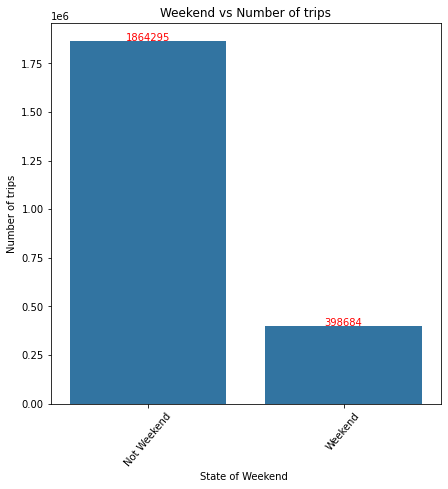

In [54]:
plt.figure(figsize=[7,7])
uni_categ_plot(col_name='Weekend',sort=False,var_count=2)
plt.xlabel('State of Weekend ');
plt.ylabel('Number of trips');
plt.title('Weekend vs Number of trips');

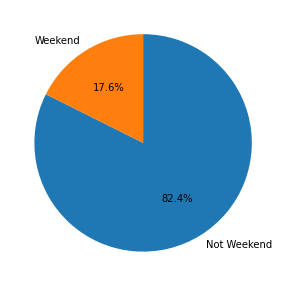

In [55]:
plt.figure(figsize=[5,5])
plt.pie(x=df_bikes['Weekend'].value_counts(),labels=df_bikes['Weekend'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- As mention before that weekend days affected a lot the number of trips , So the company may have to increase the deals during these 2 days and make a great offers and concentrate more to make these 2 days an interesting one for the employees.

- It can make an offers when you choose an end station that contain any entertaining places such cinema,park,stadium and so on. This will encourage the users to make more trips during the weekend days.

#### Exploring the user types 

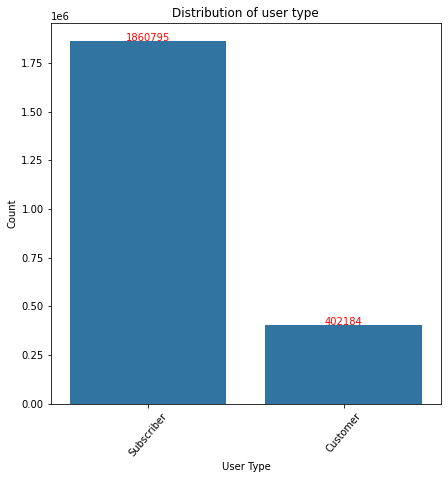

In [56]:
plt.figure(figsize=[7,7])
uni_categ_plot(col_name='user_type',sort=False,var_count=2)
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Distribution of user type');

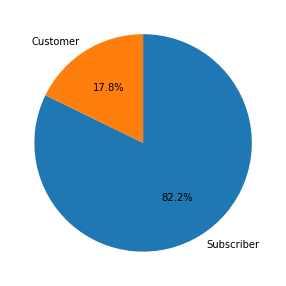

In [57]:
plt.figure(figsize=[5,5])
plt.pie(x=df_bikes['user_type'].value_counts(),labels=df_bikes['user_type'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

There is no need to say the about 83% of the users are already subscribers which is a very big number , But also this number is tricky , a lot of huge companies that neither any of us just imagine that they will collapse as they done , so this number should encourage the company to improve more and to look ahead for more and more, Let's say why not in 2021 the precentage will increase to 90%?

#### Univariate numerical exploration

In [64]:
df_bikes.duration_min.describe()

count    2.262979e+06
mean     1.344884e+01
std      3.203676e+01
min      1.016667e+00
25%      5.966667e+00
50%      9.483333e+00
75%      1.473333e+01
max      1.436950e+03
Name: duration_min, dtype: float64

In [70]:
df_bikes.duration_min.median()

9.483333333333333

#### This means that the most trips has an average trip duration of 13.4 minute only and median of 9.5 , Although we can't say that multiple trips with 23 hour are considered an outliers , We can make a tweek for a better visualization.

In [66]:
slots=['0-1 hour','1-2 hour','2-4 hour','4-8 hour','8-12 hour','12-16 hour','16-20 hour','20-24 hour']

In [67]:
slots_counts=[]
for i in range(len(slots)):
    if i < 5:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0]) ) & (df_bikes.duration_hrs<int(slots[i][2])) ].count()[0])
    elif i==5:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0]) ) & (df_bikes.duration_hrs<int(slots[i][3:5])) ].count()[0])
    else:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0:2]) ) & (df_bikes.duration_hrs<int(slots[i][3:5])) ].count()[0])
 

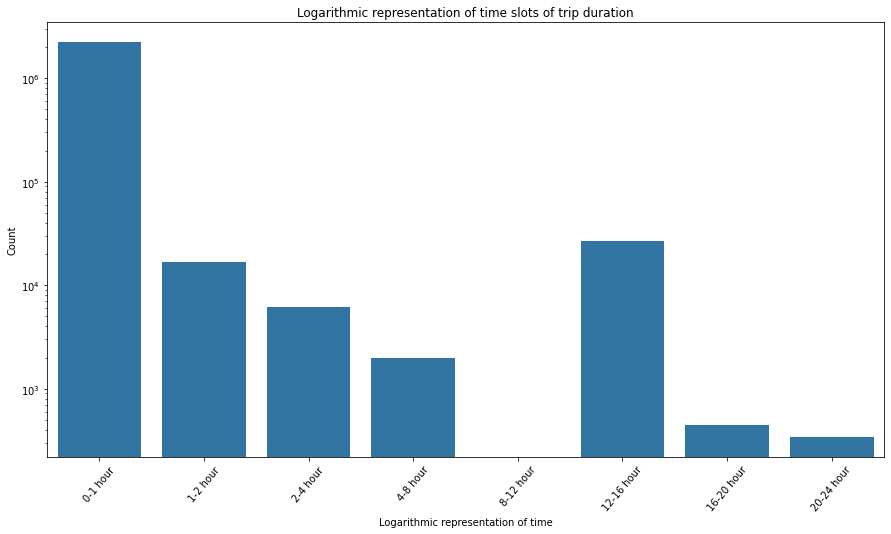

In [72]:
plt.figure(figsize=[15,8])
sns.barplot(x=slots,y=slots_counts,color=base_color)
plt.xticks(rotation=50);
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Logarithmic representation of time')
plt.title('Logarithmic representation of time slots of trip duration');

- As shown in the plot most trips not exceeds 1 hour and literally most of them are just minutes only , The only insight is that the most users spend little time in cycling

#### Finally let's explore the most frequent start and end stations 

In [550]:
print(len(df_bikes.start_station_name.value_counts()))
print(len(df_bikes.end_station_name.value_counts()))

437
436


#### As shown above there are 437 and 436 start and end stations respectively , So we will consider only the most 20 frequent stations

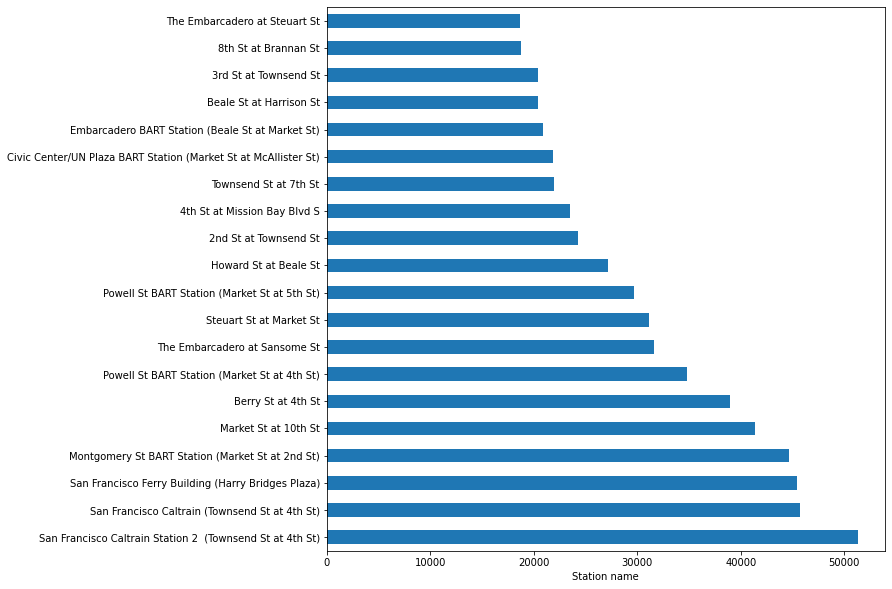

In [551]:
df_bikes['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh',figsize = (10,10)).set(xlabel = 'Station name')                                                                        
plt.show()

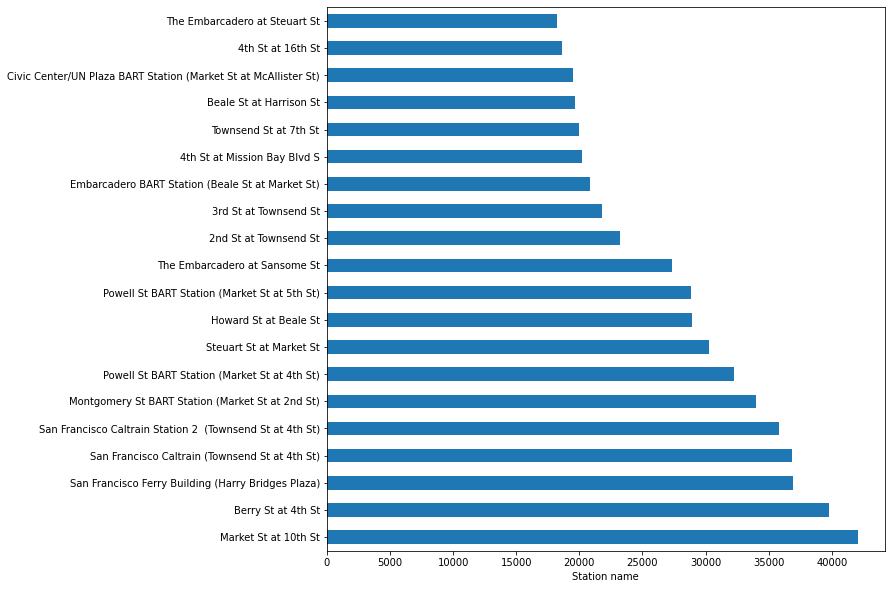

In [552]:
df_bikes.start_station_name.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh',figsize = (10,10)).set(xlabel = 'Station name')                                                                        
plt.show()

- The two plots above indicates that there are 5 or 6 stations only that dominating the start and end stations. 
- This leads us to important fact that these station can be double-sided coin , Those stations can be a challenge for the company and leads them to give the station more attention and take care of its constant maintenance and add to it some luxuries such as chargers for mobiles and Wi-Fi and so on.
- Also it can be a nightmare if the company considered them as their comfort zone and neglect its maintenance depending that users needed those stations.


### C. Bivariate exploration <a class="anchor" id="bi"></a>

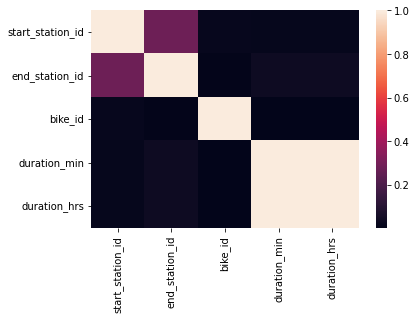

In [498]:
sns.heatmap(df_bikes.corr())
plt.show()

- The plot above doesn't show any good information about the dataset.

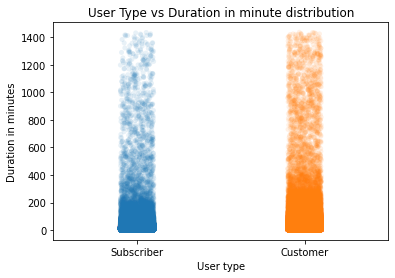

In [534]:
g = sns.stripplot(x=df_bikes["user_type"] , y=df_bikes['duration_min'] , jitter=True , alpha = 0.1)
g.set_xlabel('User type')
g.set_ylabel('Duration in minutes')
plt.title('User Type vs Duration in minute distribution')
plt.show()

Text(0.5, 1.0, 'User Type vs Duration in minute distribution')

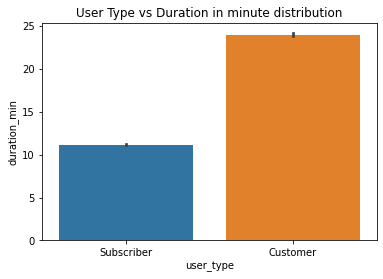

In [580]:
sns.barplot(x=df_bikes["user_type"] , y=df_bikes['duration_min'] );
plt.title('User Type vs Duration in minute distribution')

- Surprisingly the customers tend to take a longer trips than the regular subscribers by a huge margin, But also it can be explained that the subscribers subscribe for a specific reason mostly for work trip ,hence specific path which is significantly a short distance trip , in contrast the customers mostly uses the bikes suddenly or without a week before plan and for recreational trip which may be a longer trip.


In [573]:
def categ_num_plot(categ_col,numer_col):
    sns.stripplot(x=df_bikes.loc[:,categ_col] , y=df_bikes.loc[:,numer_col] , jitter=True , alpha = 0.3)

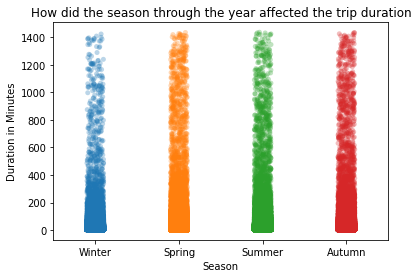

In [575]:
categ_num_plot(categ_col='Season',numer_col='duration_min')
plt.title('How did the season through the year affected the trip duration')
plt.xlabel('Season')
plt.ylabel('Duration in Minutes')
plt.show()

(0.0, 150.0)

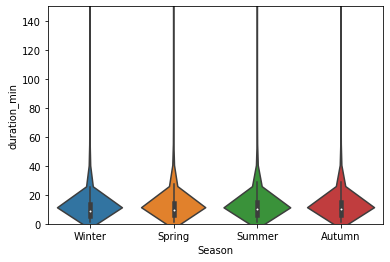

In [561]:
sns.violinplot(data=df_bikes,x=df_bikes["Season"] , y=df_bikes['duration_min'])
plt.ylim(0,150)

- The plot shows that Spring and Autumn has the most highly duration trips among Summer and Winter.
- Although Summer is not that way behind both of them.
- Winter due to the weather has the least number of trips of high duration time.

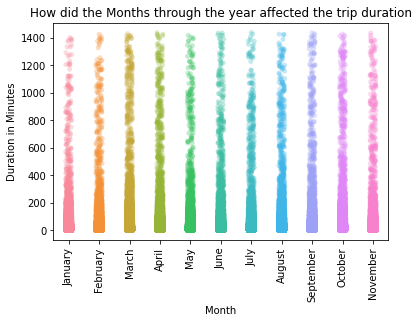

In [576]:
categ_num_plot(categ_col='Trip Month',numer_col='duration_min')
plt.xlabel('Month')
plt.ylabel('Duration in Minutes')
plt.title('How did the Months through the year affected the trip duration')
plt.xticks(rotation=90);
plt.show()

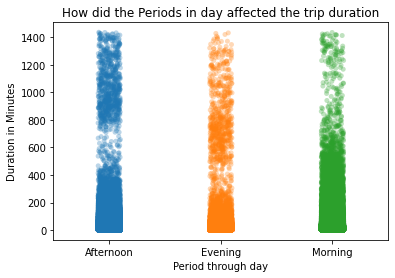

In [577]:
categ_num_plot(categ_col='Period in day',numer_col='duration_min')
plt.xlabel('Period through day')
plt.ylabel('Duration in Minutes')
plt.title('How did the Periods in day affected the trip duration')
plt.show()

- Surprisingly the number of highly duration trips is high even the number of trips in evening is very low.
- Afternoon has the most trips with high duration time in contast the Morning has the lowest one.

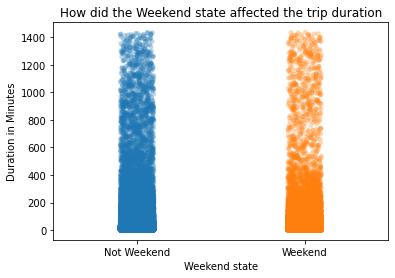

In [578]:
categ_num_plot(categ_col='Weekend',numer_col='duration_min')
plt.xlabel('Weekend state')
plt.ylabel('Duration in Minutes')
plt.title('How did the Weekend state affected the trip duration')
plt.show()

- The normal days has slighly more number of trips of high trip duration

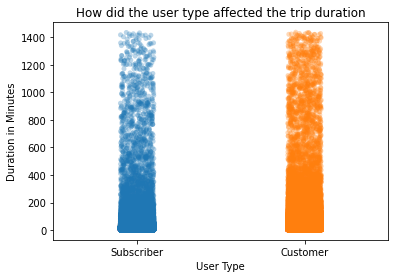

In [579]:
categ_num_plot(categ_col='user_type',numer_col='duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration in Minutes')
plt.title('How did the user type affected the trip duration')
plt.show()

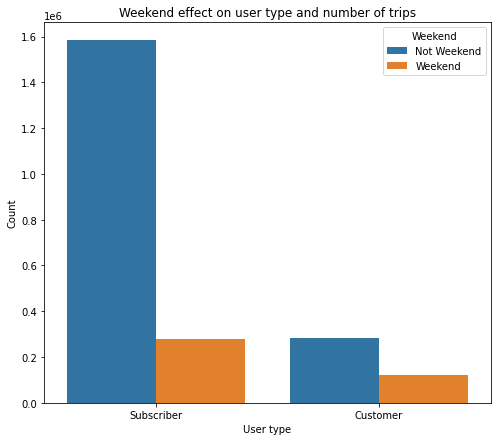

In [514]:
plt.figure(figsize=[8,7])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Weekend'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Weekend effect on user type and number of trips')
plt.show()

- This plot is the most important one in my opinion , it illustrates the reason the number of trips duration differs from the customer and subscriber.

- If you take a look in the subscriber , you will see a huge difference between number of trips in the non-weekend days which mostly are work/college/school (Planned) trips and the weekend days.
- Quite the opposite , the weekend state didn't have that effect on the number of trips which indicates that most trips of customers are non planned one which illustrates the reason behind the high duration trips that exists a lot in the customer plot previously.

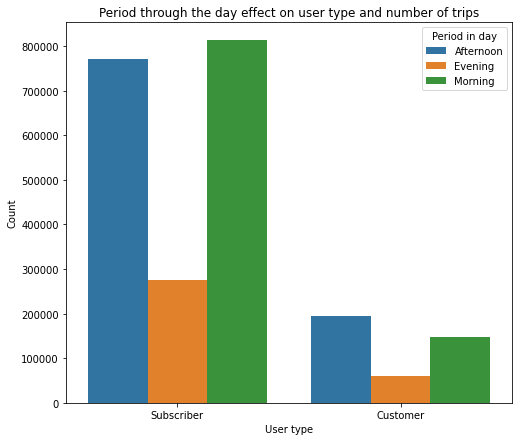

In [582]:
plt.figure(figsize=[8,7])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Period in day'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Period through the day effect on user type and number of trips')
plt.show()

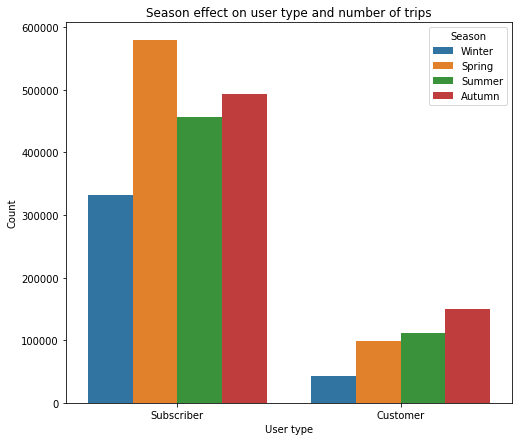

In [571]:
plt.figure(figsize=[8,7])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Season'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Season effect on user type and number of trips')
plt.show()

### D. Multivariate exploration <a class="anchor" id="mu"></a>

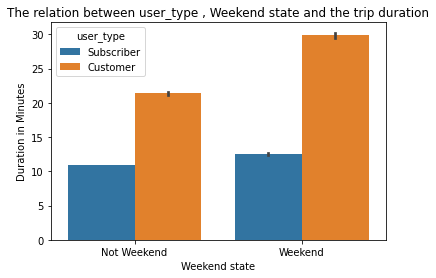

In [581]:
sns.barplot(x=df_bikes["Weekend"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Weekend state')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Weekend state and the trip duration')
plt.show()

- This plot shows as a great insight that whether the day is weekend or not the subscriber trip duration not changed a lot , while for customer trips duration it is hugely increased.

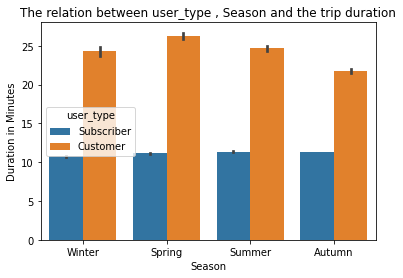

In [71]:
sns.barplot(x=df_bikes["Season"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Season')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Season and the trip duration')
plt.show()

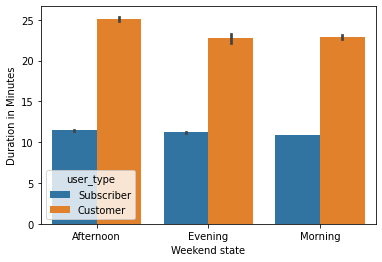

In [536]:
sns.barplot(x=df_bikes["Period in day"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Period through the day')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Season and the trip duration')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Whether the day is weekend or not, the subscriber trip duration not changed a lot , while for customer trips duration it is hugely increased.
> There is no such difference here except that the subscriber morning trips are higher in precentage than that of customer one , May be work trips play a role in this insight.Also there is no huge difference except that spring is not considered the most season in number of trips in the customer trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The weekend feature , it is main one but it has a very big impact on many aspects on the data. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is no such difference here except that the subscriber morning trips are higher in precentage than that of customer one , May be work trips play a role in this insight.Also there is no huge difference except that spring is not considered the most season in number of trips in the customer trips.

### Were there any interesting or surprising interactions between features?

> The weekend feature , it is main one but it has a very big impact on many aspects on the data. 

## Final Section  

As previously mentioned in the report. We are focussing more on the time and user aspect so that we can use them as our target customers and would also help us to prepare further in terms of quality of service. In terms of our analysis , We have concluded the following: 

### Particular day trend ? 

A good observation point was to find when has there been more rides ? We can actually see that there has been more ridership on a particular day of the week. Which brought us to the following plot. 

In the following plot , We can see that the ridership increases in the midweek. People tend to use our service more on the Wednesday and Thursday. In contrasr the ridership significantly decreases during weekend days which also affect the day before and after them. Saturday and Sunday. **We can offer discounts and offers on weekend days in order to increase ridership.** This will enable us to increas the revenue and the number of trips. While wednesday and thursday seem to be always the  days with most rides. Hence **our service officials must be prepared for the mid week rush** 

### Knowing more about our users. 

From a Sales persepective. It is important to know about the target customer. But it's even important to know whether the customers are subscribers or just customer users. Subscribers tend to generate more revenue. But a good start would be to attract more customers and make subscribers more loyal and stick to the company.
- This could happen by analysing the most start and end stations so that add some luxuries such as chargers for smartphones and Wi-Fi and so on.
- Also know the rush hours for the customers usage and give them an annual offers during their usage.

### Which day and user type are more profitable for us ?  
- Surely Thursday and Wednesday are the most profitable days for us.
- Customers and Subscribers on a Sunday and Saturday seem to spend more time using our services than any other day. There seems to be a similar trend for the weekday. Weekend must be targeted and we must ensure that the ridership increases for the particular day in order for us to yield benefit. 

### Summary 

Finally I am going to conclude this report as follows :- 
   1. Subscribers tend to be more regular , Weekday seems to be perfect though the duration is lower as compared to Saturday and Sunday.
   2. Winter affects a lot the revenue.
   3. Evening period in the day is the least one in terms of number of trips.
   4. Customers uses way more portion of trips during the weekend days with comparison to the subscribers.
   
   
We must try to increase the total amount of ridership for the weekend since the weekend shows a good increase in the duration at which the bikes are rented. Our target audience can be 25 to 35 year old since they tend to use our service much often than the others. Bike share is not pretty profitable since not many of them are using it. Hence , We must market that aspect onto the picture to increase the numbers. 